In [11]:
import h5py
import numpy as np
import pylab as plt

In [8]:
def load_cors(fname):
    f = h5py.File(fname,'r')
    cors = np.concatenate([f[c]['corrs'].value for c in f if c.startswith('chunk')  ])
    shot = f['chunk0']['shots'][0]
    
#   average the correlation
    cm = cors.mean(0)
#   normalize
    cm /= cm[:,0][:,None]
    return shot,cm

In [28]:
shot0, cors0 = load_cors('dimers.2.alpha.hdf5')
shot1, cors1= load_cors('dimers.2.1e-5.hdf5') # volume frac = 1e-5
shot2, cors2 = load_cors('dimers.2.1e-6.hdf5') # volume frac 1e-6
shot3, cors3 = load_cors('dimers.2.0.hdf5') # volume frac = 1e-7

In [22]:
def plot_image(title, shot, cor):
    plt.figure(1,figsize=(12,12))
    plt.imshow( shot, aspect=10, cmap='hot', interpolation='lanczos')
    plt.colorbar(shrink=.4)
    plt.title("%s - single scattering shot"%title)
    
    plt.figure(2,figsize=(12,12))
    plt.imshow( cor, aspect=10, cmap='gnuplot', interpolation='lanczos')
    plt.colorbar(shrink=.4)
    plt.title("%s - average auto correlation"%title)
    
    plt.show()

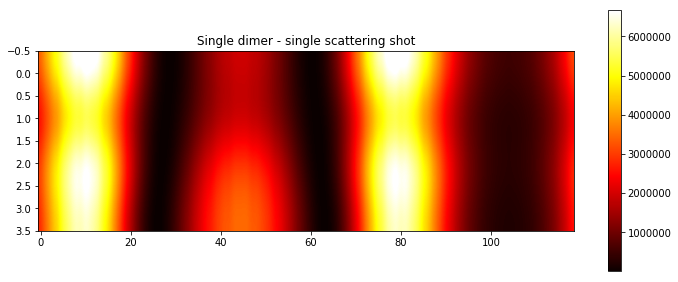

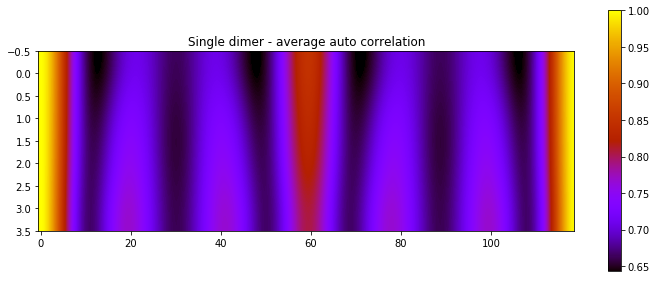

In [29]:
plot_image('Single dimer', shot0, cors0)

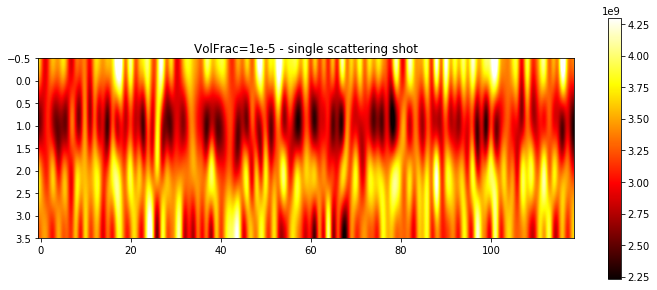

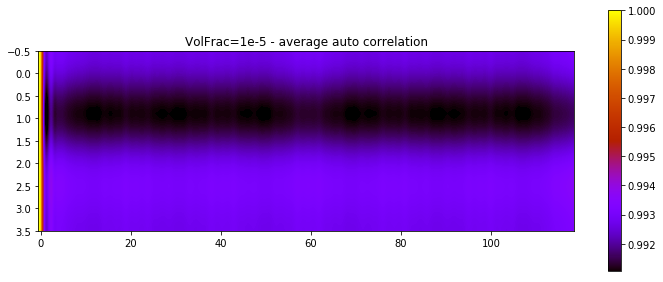

In [23]:
plot_image('VolFrac=1e-5', shot1, cors1)

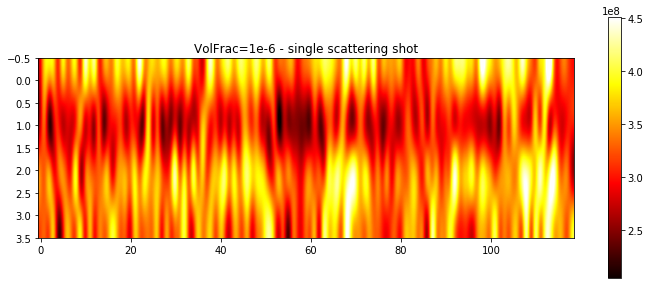

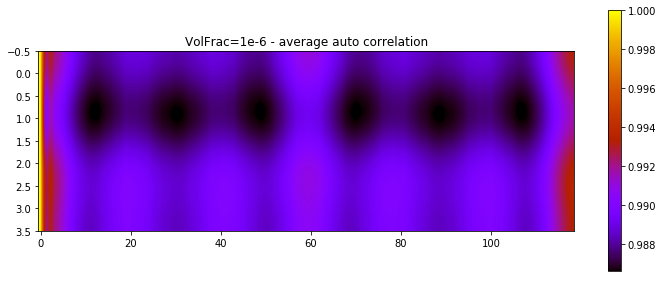

In [26]:
plot_image('VolFrac=1e-6', shot2, cors2)

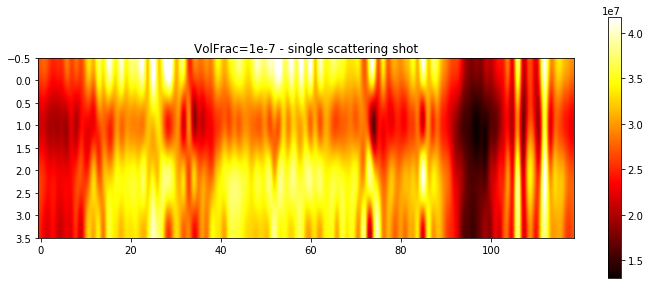

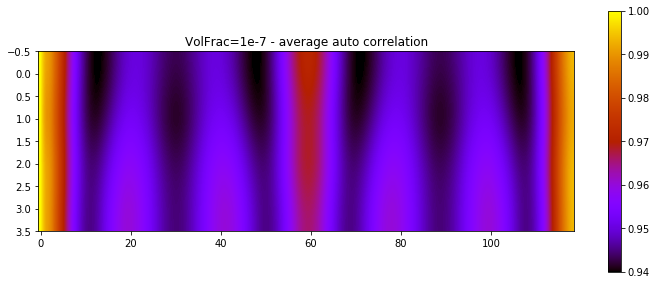

In [27]:
plot_image('VolFrac=1e-7', shot3, cors3)

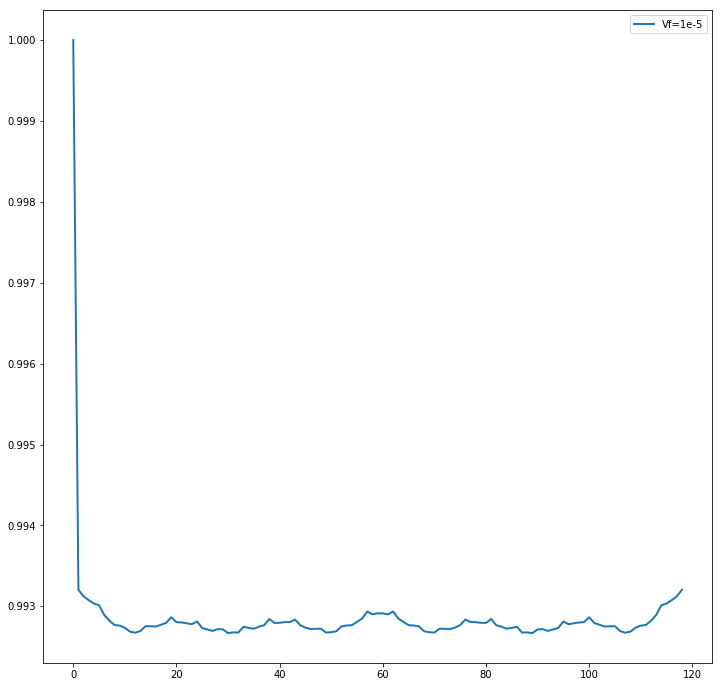

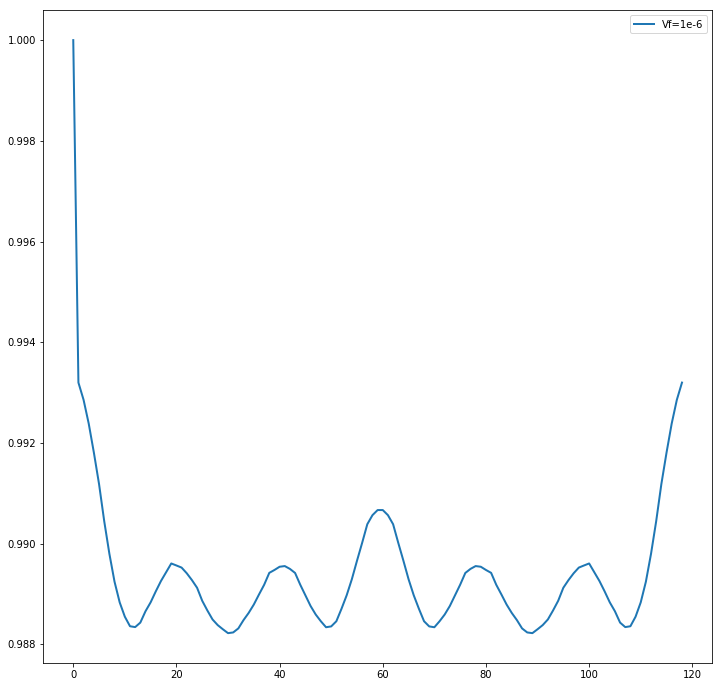

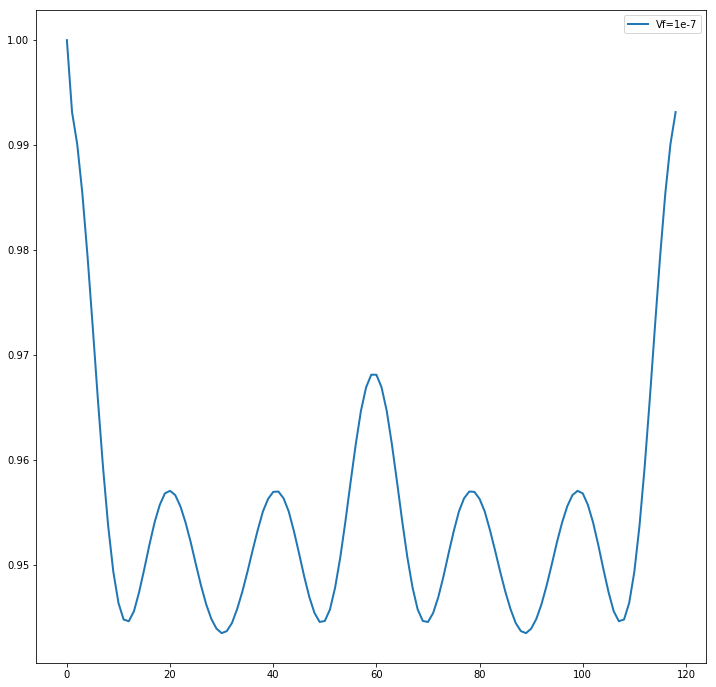

In [46]:
plt.figure(1,figsize=(12,12))
plt.plot( cors1[2], label='Vf=1e-5', lw=2)
plt.legend()


plt.figure(2,figsize=(12,12))
plt.plot( cors2[2], label='Vf=1e-6', lw=2)
plt.legend()


plt.figure(3,figsize=(12,12))

plt.plot( cors3[2], label='Vf=1e-7', lw=2)
plt.legend()
plt.show()